<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [71]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [3]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [4]:
#Task 1: Familiarize yourself with the dataset 

boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [5]:
boston_df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x24370ff9890>,
 'caps': [<matplotlib.lines.Line2D at 0x24370ffae90>,
 'boxes': [<matplotlib.lines.Line2D at 0x24370ff8c90>],
 'medians': [<matplotlib.lines.Line2D at 0x24371004410>],
 'fliers': [<matplotlib.lines.Line2D at 0x24370fc8d90>],
 'means': []}

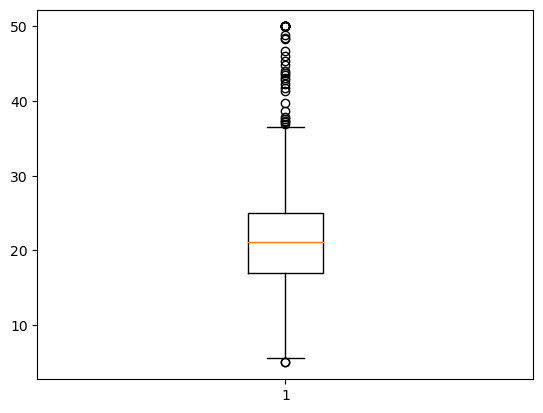

In [8]:
# TASK 2 : For the "Median value of owner-occupied homes" provide a boxplot

pyplot.boxplot(x=boston_df['MEDV'])

value_count : CHAS
0.0    471
1.0     35
Name: count, dtype: int64


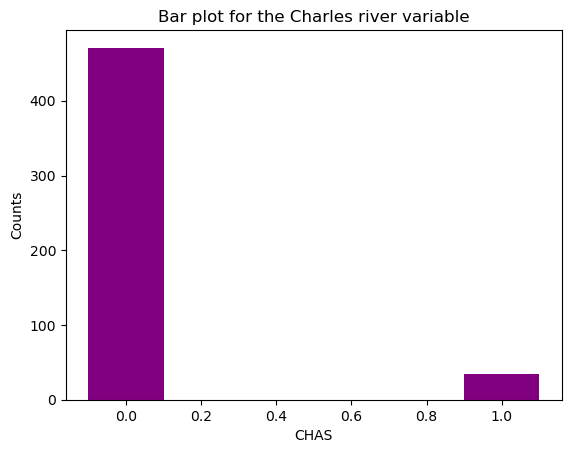

In [42]:
# TASK 2 : Provide a  bar plot for the Charles river variable
val_count=boston_df['CHAS'].value_counts()
print("value_count :",val_count)
x=val_count.index
y=val_count.values
pyplot.bar(x,y,color='purple',width=0.2)
pyplot.xlabel('CHAS')
pyplot.ylabel('Counts')
pyplot.title("Bar plot for the Charles river variable")
pyplot.show()

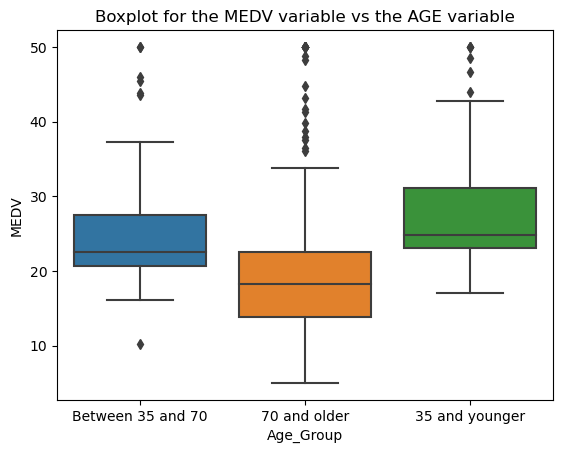

In [62]:
# TASK 2 : Provide a boxplot for the MEDV variable vs the AGE variable. 
# (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df.loc[boston_df['AGE'] <= 35, 'Age_Group'] = "35 and younger"
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = "Between 35 and 70"
boston_df.loc[boston_df['AGE'] >= 70, 'Age_Group'] = "70 and older"
sns.boxplot(x = 'Age_Group', y = 'MEDV', data = boston_df)
pyplot.xlabel('Age_Group')
pyplot.ylabel("MEDV" )
pyplot.title("Boxplot for the MEDV variable vs the AGE variable")
pyplot.show()

In [54]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age_Group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,Between 35 and 70
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,Between 35 and 70
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,Between 35 and 70
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,Between 35 and 70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,Between 35 and 70
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 and older
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 and older
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 and older


<Axes: xlabel='INDUS', ylabel='NOX'>

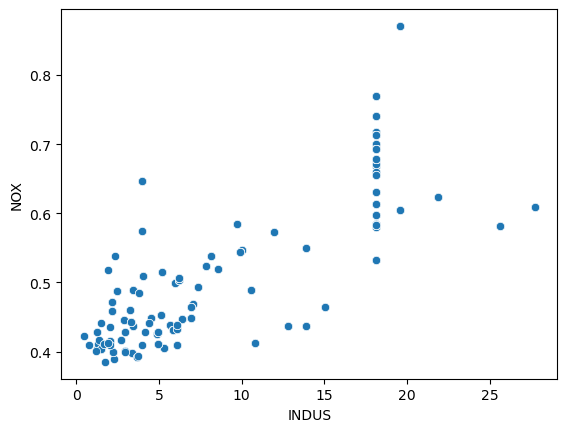

In [51]:
# TASK 2 : Provide a scatter plot to show the relationship between Nitric oxide concentrations and 
# the proportion of non-retail business acres per town. What can you say about the relationship?

sns.scatterplot(x='INDUS',y='NOX',data=boston_df)

(array([ 15.,   2.,  58.,  15.,  35.,  69.,  76.,  40., 178.,  18.]),
 array([12.6 , 13.54, 14.48, 15.42, 16.36, 17.3 , 18.24, 19.18, 20.12,
        21.06, 22.  ]),
 <BarContainer object of 10 artists>)

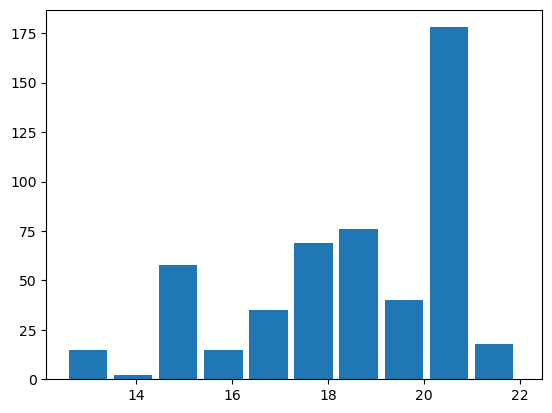

In [66]:
# TASK 2 : Create a histogram for the pupil to teacher ratio variable
pyplot.hist(boston_df['PTRATIO'],width=0.8)

In [95]:
# TASK 3: Is there a significant difference in median value of houses bounded by the
# Charles river or not? (T-test for independent samples)

print("H0: there is no significant difference in median value of houses bounded by the Charles river ")
print("Ha: there is significant difference in median value of houses bounded by the Charles river ")

medv = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_not= boston_df[boston_df['CHAS'] == 0]['MEDV']

t_value, p_value = stats.ttest_ind(medv,medv_not)

print("t-value : ",t_value,"p-value : ",p_value)
print("\nT-test for independent samples Test Result:")
a= 0.05
if p_value < a:
    print("There is a significant difference in the median value of houses bounded by the Charles River.")
else:
    print("There is no significant difference in the median value of houses bounded by the Charles River.")


H0: there is no significant difference in median value of houses bounded by the Charles river 
Ha: there is significant difference in median value of houses bounded by the Charles river 


<IPython.core.display.Javascript object>

t-value :  3.996437466090509 p-value :  7.390623170519905e-05

T-test for independent samples Test Result:
There is a significant difference in the median value of houses bounded by the Charles River.


In [92]:
# TASK 3: Is there a difference in Median values of houses (MEDV) for each proportion of owner 
# occupied units built prior to 1940 (AGE)? (ANOVA)


print("H0: There is no a difference in MEDV for AGE")
print("Ha: There is a difference in MEDV for AGE")
young = boston_df[boston_df['Age_Group'] == '35 and younger']['MEDV']
young_bet= boston_df[boston_df['Age_Group'] == 'Between 35 and 70']['MEDV']
old =  boston_df[boston_df['Age_Group'] == '70 and older']['MEDV']

t_value, p_value = stats.f_oneway(young,young_bet,old)

print("t-value : ",t_value,"p-value : ",p_value)
print("\nANOVA Test Result:")
a= 0.05
if p_value > a:
    print("H0: There is no a difference in MEDV for AGE")
else:
    print("Ha: There is a difference in MEDV for AGE")


H0: There is no a difference in MEDV for AGE
Ha: There is a difference in MEDV for AGE


<IPython.core.display.Javascript object>

t-value :  36.40764999196599 p-value :  1.7105011022702984e-15

ANOVA Test Result:
Ha: There is a difference in MEDV for AGE


In [91]:
# TASK 3: Can we conclude that there is no relationship between Nitric oxide 
# concentrations (NOX) and proportion of non-retail business acres per town (INDUS)? (Pearson Correlation)

print("H0: There is no relationship between NOX and INDUS")
print("Ha: There is a relationship between NOX and INDUS")

correlation_coefficient, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("Coefficient: ", correlation_coefficient)
print("p-value: ", p_value)

a = 0.05
print("\nPearson Correlation Test Result:")
if p_value > a:
    print("There is no  relationship between NOX and INDUS")
else:
    print("There is a relationship between NOX and INDUS")



H0: There is no relationship between NOX and INDUS
Ha: There is a relationship between NOX and INDUS


<IPython.core.display.Javascript object>

Coefficient:  0.763651446920915
p-value:  7.913361061241167e-98

Pearson Correlation Test Result:
There is a relationship between NOX and INDUS


In [102]:
# TASK 3: What is the impact of an additional (DIS) weighted distance  to the five Boston 
# employment centres on the median value of owner occupied homes(MEDV)? (Regression analysis)

X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
print(model.summary())

dis_coef = model.params['DIS']
dis_pvalue = model.pvalues['DIS']

print("coefficient : ",dis_coef,"P_value : ",dis_pvalue)
a=0.05
print("\nResult:")
if dis_pvalue > a:
        print("The regression analysis suggests that there is no significant relationship between DIS and MEDV")
else:
     print("The regression analysis suggests that there is a significant relationship between DIS and MEDV")
    


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 21 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        06:58:42   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0